In [1]:
import numpy as np
from matplotlib import pyplot as plt
import utils

In [2]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))
        
    
    def tanh(self, x):
        return np.tanh(x) # tanh function itself
    
    def tanh_derivative(self, x):
        return (1 - np.square(np.tanh(x))) #derivative of the tanh function
    
    def forward(self, inputs):
        # Forward pass through the network
        # We first calculate the dot product of the inputs and the weights(multiplying them and adding them)
        # after that, we add the bias parameter. The result of this calculation will be the input of the tanh function.
        tanh_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.tanh(tanh_input)

        #Now, we need to calculate the output parameter with the same way
        tanh_input2 = np.dot(self.hidden_output,self.weights_hidden_output) + self.bias_output
        self.output = self.tanh(tanh_input2)
        return self.output
    
    def backward(self, inputs, targets, learning_rate):
        # Backward pass through the network
        # Compute error
        # In here, the error will be the difference between the target and the output that we calculate.
        output_error = targets - self.output
        hidden_error = np.dot(output_error,self.weights_hidden_output.T)
        # Compute grads
        output_delta = output_error * self.tanh_derivative(self.output)
        hidden_delta = hidden_error * self.tanh_derivative(self.hidden_output)
        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_output.T,output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(inputs.T,hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

In [3]:
x_train, y_train, x_val, y_val = utils.part1CreateDataset(train_samples=1000, val_samples=100, std=0.4)

Epoch 0: Loss = 0.8235713267875728
Epoch 1000: Loss = 0.04459445295815394
Epoch 2000: Loss = 0.04290561441994432
Epoch 3000: Loss = 0.036467881141081536
Epoch 4000: Loss = 0.0360738493291804
Epoch 5000: Loss = 0.03638034134452279
Epoch 6000: Loss = 0.037596937239886004
Epoch 7000: Loss = 0.042911420852054336
Epoch 8000: Loss = 0.04881378405267069
Epoch 9000: Loss = 0.050139562486487835
97.0 % of test examples classified correctly.


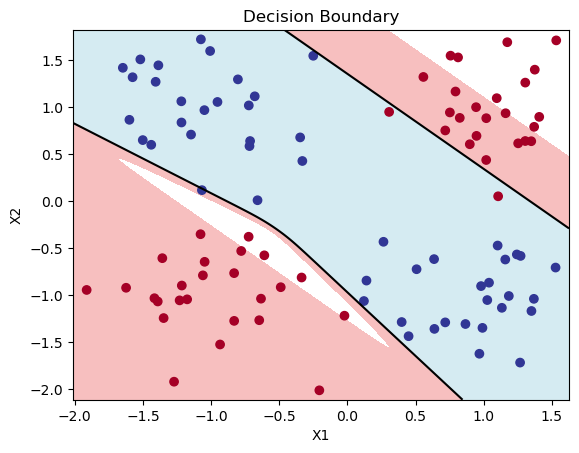

In [6]:

input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.001

# nn
nn = MLP(input_size, hidden_size, output_size)
# train
for epoch in range(10000):
    # Forward propagation
    output = nn.forward(x_train)
    # Backpropagation
    nn.backward(x_train,y_train,learning_rate)
    # Print the loss (MSE)
    if epoch % 1000 == 0:
        loss = np.mean((y_train-output)**2) #mse
        print(f'Epoch {epoch}: Loss = {loss}')
# test
y_predict = nn.forward(x_val) > 0.5

print(f'{np.mean(y_predict==y_val)*100} % of test examples classified correctly.')
utils.part1PlotBoundary(x_val, y_val, nn)